# Getting Started with the Backtester

This notebook demonstrates:
1. Setting up the environment
2. Generating sample data
3. Loading and validating data
4. Basic configuration
5. Running a simple backtest

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from backtesting import Backtester, BacktestConfig, DataManager
from generate_sample_data import generate_sample_data

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

## Step 1: Generate Sample Data

Let's generate sample data for 100 securities over 252 trading days.

In [2]:
generate_sample_data(
    n_securities=100,
    n_days=252,
    n_factors=5,
    output_dir='../sample_data',
    seed=42
)

Generating sample data...
Securities: 100
Days: 252
Factors: 5

Generating prices...
  Saved prices.csv
Generating ADV...
  Saved adv.csv
Generating betas...
  Saved betas.csv
Generating factor model...
  Saved factor_exposures.csv
  Saved factor_returns.csv
  Saved factor_covariance.csv
  Saved specific_variance.csv
Generating sector mapping...
  Saved sector_mapping.csv
Generating sample signals...
  Saved signals.csv
Generating sample target positions...
  Saved target_weights.csv

Sample data generated successfully in ../sample_data


## Step 2: Load Data

Use the DataManager to load all data files.

In [3]:
data_manager = DataManager(data_dir='../sample_data', use_float32=True)

# Load required data
prices = data_manager.load_prices()
adv = data_manager.load_adv()
betas = data_manager.load_betas()
sector_mapping = data_manager.load_sector_mapping()

print(f"\nData loaded successfully!")
print(f"Price data shape: {prices.shape}")
print(f"Date range: {prices.index[0].date()} to {prices.index[-1].date()}")
print(f"Number of securities: {len(prices.columns)}")

prices.index

Loaded prices: 252 dates, 100 securities
Loaded ADV: 252 dates, 100 securities
Loaded betas: 252 dates, 100 securities
Loaded sector mapping: 100 securities, 10 sectors

Data loaded successfully!
Price data shape: (252, 100)
Date range: 2023-01-02 to 2023-12-19
Number of securities: 100


DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19'],
              dtype='datetime64[ns]', length=252, freq=None)

## Step 3: Explore the Data

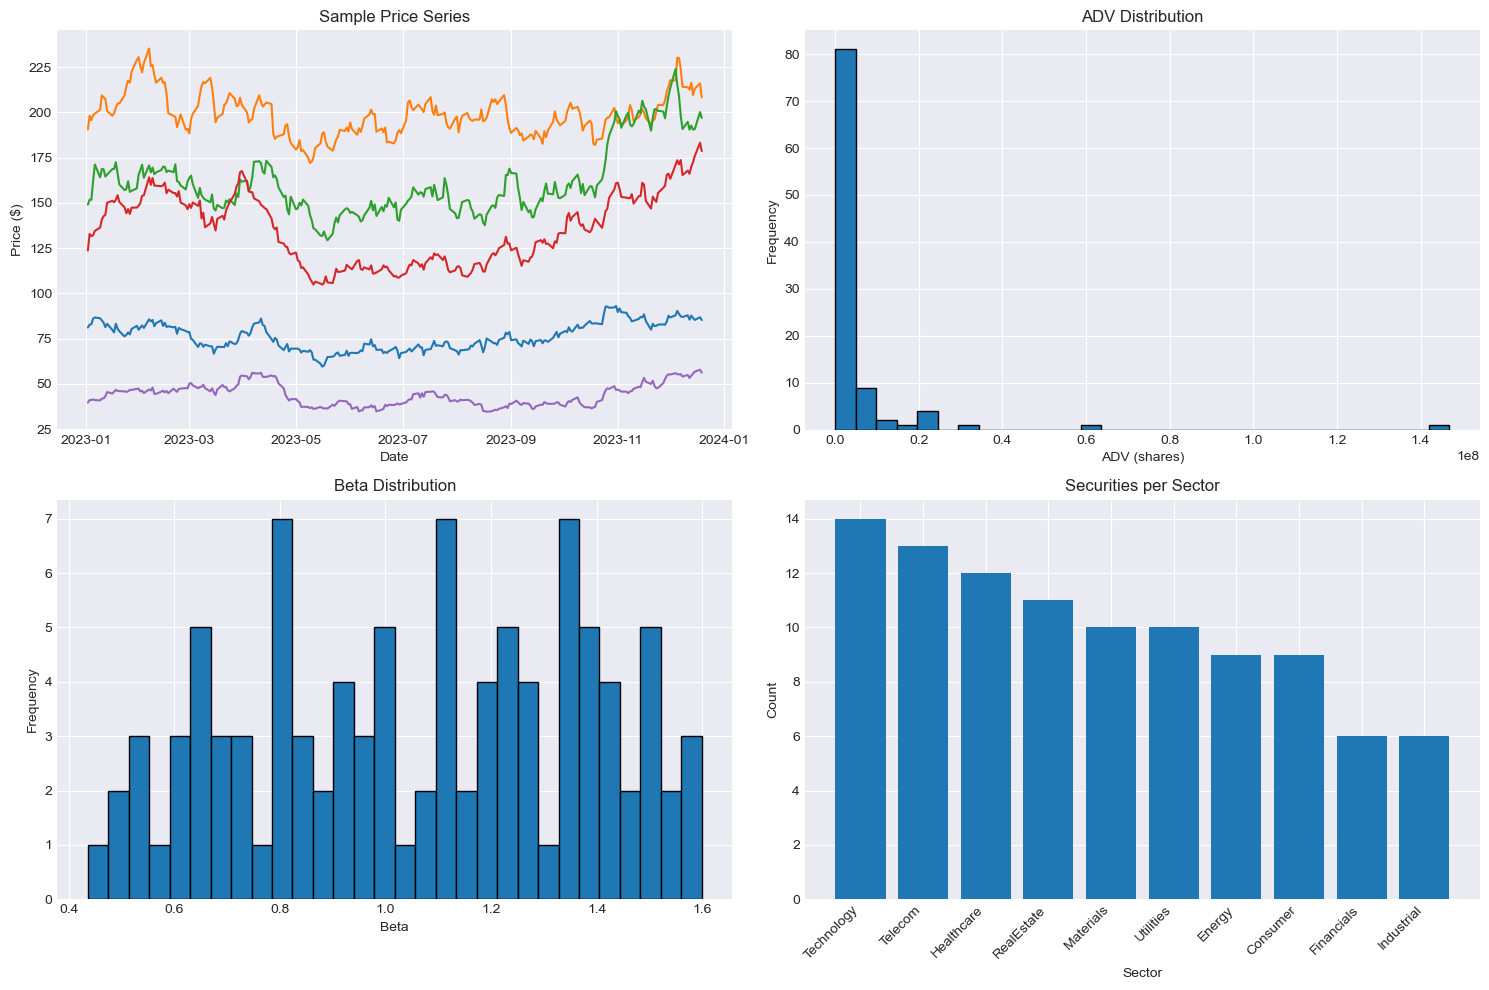

In [4]:
# Plot some sample prices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price series
axes[0, 0].plot(prices.iloc[:, :5])
axes[0, 0].set_title('Sample Price Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')

# ADV distribution
axes[0, 1].hist(adv.iloc[0], bins=30, edgecolor='black')
axes[0, 1].set_title('ADV Distribution')
axes[0, 1].set_xlabel('ADV (shares)')
axes[0, 1].set_ylabel('Frequency')

# Beta distribution
axes[1, 0].hist(betas.iloc[0], bins=30, edgecolor='black')
axes[1, 0].set_title('Beta Distribution')
axes[1, 0].set_xlabel('Beta')
axes[1, 0].set_ylabel('Frequency')

# Sector distribution
sector_counts = sector_mapping['sector'].value_counts()
axes[1, 1].bar(range(len(sector_counts)), sector_counts.values)
axes[1, 1].set_title('Securities per Sector')
axes[1, 1].set_xlabel('Sector')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(range(len(sector_counts)))
axes[1, 1].set_xticklabels(sector_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Step 4: Validate Data

Check for data quality issues.

In [5]:
issues = data_manager.validate_data()

if issues:
    print("Data validation issues:")
    for issue in issues:
        print(f"  - {issue}")
else:
    print("✓ Data validation passed!")

✓ Data validation passed!


## Step 5: Configure a Simple Backtest

Create a basic configuration for an equal-weight portfolio.

In [6]:
config = BacktestConfig(
    initial_cash=10_000_000,
    max_adv_participation=0.05,
    tc_power=1.5,
    tc_coefficient=0.01,
    enable_beta_hedge=False,
    enable_sector_hedge=False,
    risk_free_rate=0.02
)

print("Configuration created:")
print(f"  Initial cash: ${config.initial_cash:,.0f}")
print(f"  Max ADV participation: {config.max_adv_participation:.1%}")
print(f"  Transaction cost power: {config.tc_power}")

Configuration created:
  Initial cash: $10,000,000
  Max ADV participation: 5.0%
  Transaction cost power: 1.5


## Step 6: Run a Simple Backtest

Run a backtest with equal-weight target positions (Use Case 1).

In [ ]:
# Create equal-weight targets for each day
target_weights = pd.read_csv('../sample_data/target_weights.csv', index_col=0, parse_dates=True)

# Convert to dictionary format
targets_by_date = {
    date: target_weights.loc[date].to_dict()
    for date in target_weights.index
}

inputs = {
    'type': 'weights',
    'targets': targets_by_date
}

# Initialize backtester
backtester = Backtester(config, data_manager)

# Run backtest
results = backtester.run(
    start_date=pd.Timestamp('2023-01-02'),
    end_date=pd.Timestamp('2023-12-31'),
    use_case=1,
    inputs=inputs,
    show_progress=True
)


Starting Backtest - Use Case 1
Period: 2023-01-01 to 2023-12-31

Loading data...
Loaded factor exposures: 252 dates, 100 securities, 5 factors
Loaded factor returns: 252 dates, 5 factors
Loaded factor covariance: (5, 5)
Loaded specific variance: 252 dates, 100 securities
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19'],
              dtype='datetime64[ns]', length=252, freq=None) <class 'pandas._libs.tslibs.timestamps.Timestamp'>


KeyError: Timestamp('2023-01-01 00:00:00')

## Step 7: Analyze Results

In [ ]:
# Print summary
results.print_summary()

# Get metrics
metrics = results.calculate_metrics()

print(f"\nKey Metrics:")
print(f"  Total Return: {metrics['total_return']:.2%}")
print(f"  Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
print(f"  Max Drawdown: {metrics['max_drawdown']:.2%}")
print(f"  Win Rate: {metrics['win_rate']:.2%}")

## Step 8: Visualize Results

In [ ]:
# Convert to DataFrame for plotting
results_df = results.to_dataframe()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Cumulative returns
cum_returns = (results_df['portfolio_value'] / results_df['portfolio_value'].iloc[0] - 1) * 100
axes[0, 0].plot(results_df['date'], cum_returns)
axes[0, 0].set_title('Cumulative Returns')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

# Daily PnL
axes[0, 1].bar(results_df['date'], results_df['daily_pnl'], alpha=0.7)
axes[0, 1].set_title('Daily PnL')
axes[0, 1].set_ylabel('PnL ($)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Exposures
axes[1, 0].plot(results_df['date'], results_df['gross_exposure'], label='Gross')
axes[1, 0].plot(results_df['date'], results_df['net_exposure'], label='Net')
axes[1, 0].set_title('Portfolio Exposures')
axes[1, 0].set_ylabel('Exposure ($)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Transaction costs
cum_costs = results_df['transaction_cost'].cumsum()
axes[1, 1].plot(results_df['date'], cum_costs)
axes[1, 1].set_title('Cumulative Transaction Costs')
axes[1, 1].set_ylabel('Cost ($)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 9: Generate Full Report

In [ ]:
# Generate all reports
results.generate_full_report(
    output_dir='../output/basic_backtest',
    formats=['pdf', 'html', 'excel', 'csv']
)

print("Reports generated! Check the '../output/basic_backtest' directory.")
print("  - backtest_report.pdf   (Professional PDF report)")
print("  - backtest_report.html  (Interactive HTML report)")
print("  - backtest_report.xlsx  (Excel workbook)")
print("  - backtest_results.csv  (Daily performance data)")
print("  - charts/               (Individual chart images)")

## Summary

In this notebook, we:
1. ✓ Generated sample data
2. ✓ Loaded and validated data
3. ✓ Configured a simple backtest
4. ✓ Ran an equal-weight portfolio backtest
5. ✓ Analyzed results and generated reports

Next steps:
- Try notebook 02 for target positions with hedging
- Try notebook 03 for signal-based strategies
- Try notebook 04 for risk-managed portfolios